## Nullmessung

In [1]:
import uncertainties as uc
import uncertainties.unumpy as un
n0 = 98
dn0 = 9.9

## Absorption von $\beta$-Strahlung

In [2]:
datab = pd.DataFrame.from_items([
        ("Messzeit [s]", [30,30,30,30,30,30,120,120,120,120,120,120,120,120,120]),
        ("Dicke [mm]", arange(0,4.5,0.3)),
        ("n [counts]", [1329,949,614,385,281,194,394,262,138,109,75,70,59,44,41])
    ])
datab["$\Delta$n"] = sqrt(datab.iloc[:,2])
dt = 1
ds = 0.05
n0b = 122
dn0b = sqrt(n0b)
t0b = 300
display(datab)

Messzeit [s]  Dicke [mm]  n [counts]  $\Delta$n
0             30         0.0        1329  36.455452
1             30         0.3         949  30.805844
2             30         0.6         614  24.779023
3             30         0.9         385  19.621417
4             30         1.2         281  16.763055
5             30         1.5         194  13.928388
6            120         1.8         394  19.849433
7            120         2.1         262  16.186414
8            120         2.4         138  11.747340
9            120         2.7         109  10.440307
10           120         3.0          75   8.660254
11           120         3.3          70   8.366600
12           120         3.6          59   7.681146
13           120         3.9          44   6.633250
14           120         4.2          41   6.403124

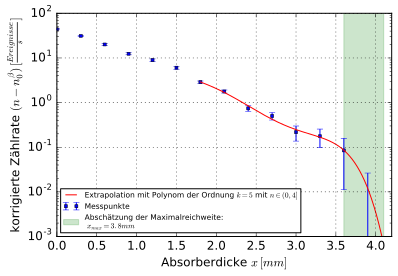

In [3]:
nn = datab.iloc[:,2]/datab.iloc[:,0] - n0b/300
dnn = sqrt((datab.iloc[:,3]/datab.iloc[:,0])**2 + (dn0b/300)**2)

import scipy.interpolate as ip

figure()
# title(r'$\beta$'+u'-Strahlung in Abhängigkeit der Absorberdicke mit Extrapolation')
grid()
yscale('log', nonposy='clip')
xlabel('Absorberdicke $x \, [mm]$')
ylabel(u'korrigierte Zählrate '+r'$(n-n_0^{\beta}) \, [\frac{Ereignisse}{s}]$')
errorbar(datab.iloc[:,1], nn, yerr=dnn, fmt='bs', label='Messpunkte')

sl_upper = 4
sl = (nn.values > 0) & (nn.values <= sl_upper)
k = 5
xspace = linspace(datab.iloc[:,1].values[sl][0], 4.2, num=1000)
extrapolator = ip.UnivariateSpline(datab.iloc[:,1].values[sl], log(nn.values[sl]), k=5)
plot(xspace, exp(extrapolator(xspace)), color='r',
     label='Extrapolation mit Polynom der Ordnung $k={0}$ mit $n \in (0,{1}]$'.format(k,sl_upper))
x1 = 3.6
x2 = 4.1
xM = x1+abs(x1-x2)/2
fill_betweenx(linspace(1e-3,1e4), x1, x2, color='g', alpha=0.2)
xlim(0, xspace[-1])
ylim(1e-3,1e2)
handles, labels = gca().get_legend_handles_labels()
p = Rectangle((0, 0), 1, 1, color='g', alpha=0.2)
handles.append(p)
labels.append(u'Abschätzung der Maximalreichweite:\n $x_{{max}} = {:.2}mm$'.format(xM))
legend(handles, labels, loc='lower left', fontsize=7.5)
show()

## $\gamma$-Absorption

In [4]:
datay = pd.DataFrame.from_items([
        ("Messzeit [s]", [60] * 11),
        ("Dicke [mm]", arange(0,5.5,0.5)),
        ("n [counts]", [5417,3640,2721,2067,1491,1140,845,604,504,368,307])
    ])
datay["$\Delta$n"] = sqrt(datay.iloc[:,2])
display(datay)

Messzeit [s]  Dicke [mm]  n [counts]  $\Delta$n
0             60         0.0        5417  73.600272
1             60         0.5        3640  60.332413
2             60         1.0        2721  52.163205
3             60         1.5        2067  45.464272
4             60         2.0        1491  38.613469
5             60         2.5        1140  33.763886
6             60         3.0         845  29.068884
7             60         3.5         604  24.576411
8             60         4.0         504  22.449944
9             60         4.5         368  19.183326
10            60         5.0         307  17.521415

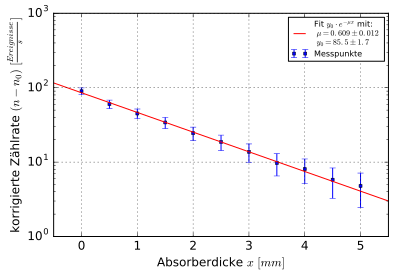

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
from scipy.optimize import curve_fit

x = datay.iloc[:,1].values
n = datay.iloc[:,2].values/60 - n0/300
dn = sqrt((datay.iloc[:,3].values/sqrt(60))**2 + (dn0/sqrt(300))**2)

def fit_exp(x, mu, y0):
    return y0*exp(-mu*x)

popt, pcov = curve_fit(fit_exp, x, n, sigma=dn)

figure()
grid()
errorbar(x, n, yerr=dn, fmt='bs', label='Messpunkte')
x_ = linspace(-0.5,5.5,1000)
plot(x_, fit_exp(x_, *popt), 'r-',
     label='Fit $y_0 \cdot e^{{- \mu x}}$ mit:\n $\mu = {0:.3f} \pm {1:.3f}$ \n $y_0 = {2:.1f} \pm {3:.1f}$'.format(popt[0],
                                                                                                           sqrt(pcov[0][0]),
                                                                                                           popt[1],
                                                                                                           sqrt(pcov[1][1])))
yscale('log')
legend(fontsize=8)
xlim((-0.5, 5.5))
ylim((1, 1e3))
xlabel(r'Absorberdicke $x \ [mm]$')
ylabel(r'korrigierte Zählrate $(n-n_0) \ [\frac{Ereignisse}{s}]$')
show()

rho_pb = 11.34
mu = uc.ufloat(popt[0], sqrt(pcov[0][0]))
murho = mu/rho_pb
display(Latex('$\mu = {0:L}$'.format(mu)))
display(Latex(r'$\frac{{\mu}}{{\rho_{{Pb}}}} = {0:L}$'.format(murho)))

## $\gamma$-Aktivität

In [6]:
datay2 = pd.DataFrame.from_items([
        ("Messzeit $[s]$", [60]*3),
        ("Abstand $[cm]$", [5,10,20]),
        ("Zählrate $n$", [70924, 19887, 4700])
    ])
datay2["$\Delta n$"] = sqrt(datay2.iloc[:,2])
display(datay2)

Messzeit $[s]$  Abstand $[cm]$  Zählrate $n$  $\Delta n$
0              60               5         70924  266.315602
1              60              10         19887  141.021275
2              60              20          4700   68.556546

In [7]:
import datetime as dt
n = un.uarray(datay2.iloc[:,2].values, datay2.iloc[:,3].values)/60/2
d = un.uarray(datay2.iloc[:,1].values, 0.5)

e = 0.04
r = 0.7

A_0 = 3280e3
t = abs((dt.date(2016,1,1)-dt.date(2016,5,3)).days)
T12 = 5.27 * 365
A_E = A_0 * exp(-log(2)/T12 * t)
display(A_E)

A = 4*n*d**2/e/r**2

table_A = ["<tr><th></th><th>$A$</th><th>$A - A_{Erwatung}$</th></tr>"]
for i in range(3):
    table_A.append("<tr><th>Messung {0}</th><td>${1:L}$</td><td>${2:L}$</td></tr>".format(i+1,A[i], abs(A[i]-A_E)))
display(HTML('<table>{}</table>'.format("".join(table_A))))

3137795.9670419856

In [8]:
l = 4
Ak1 = 4*n*(d+l/2)**2/e/r**2
k1 = Ak1/A

table_Ak1 = ["<h3>Raumwinkel-Korrektur</h3>","<tr><th></th><th>$A_{korr}$</th><th>$A_{korr} - A_{Erwatung}$</th><th>$k_1$</th></tr>"]
for i in range(3):
    table_Ak1.append("<tr><th>Messung {0}</th><td>${1:L}$</td><td>${2:L}$</td><td>${3:L}$</td></tr>".format(i+1,Ak1[i], abs(Ak1[i]-A_E), k1[i]))
display(HTML('<table>{}</table>'.format("".join(table_Ak1))))

In [9]:
import uncertainties.umath as um
r_Abs = 7.9
l_abs = 0.14
k2 = um.exp(murho*r_Abs*l_abs)
Ak2 = Ak1 * k2

table_Ak2 = ["<h3>Absorptions-Korrektur</h3>",
    "<tr><th></th><th>$A_{offen}$</th><th>$A_{offen} - A_{Erwatung}$</th><th>$k_2$</th></tr>"]
for i in range(3):
    table_Ak2.append("<tr><th>Messung {0}</th><td>${1:L}$</td><td>${2:L}$</td><td>${3:L}$</td></tr>".format(i+1,Ak2[i], abs(Ak2[i]-A_E), 1/k2))
display(HTML('<table>{}</table>'.format("".join(table_Ak2))))

## $\alpha$-Absorption

In [10]:
dataa = pd.DataFrame.from_items([
        ("Messzeit $[s]$", [60]*17),
        ("Druck $[mbar]$", [20,120,220,320,350,380,410,440,470,500,530,630,730,830,400,425,455]),
        ("Zählrate $n$", [13067,13175,12957,12549,11920,10265,7483,4307,1862,629,262,202,187,216,8772,5773,2810])
    ])
dataa.sort_values("Druck $[mbar]$", inplace=True)
dataa.reset_index(drop=True, inplace=True)
dataa["$\Delta n$"] = sqrt(dataa.iloc[:,2])
display(dataa)

Messzeit $[s]$  Druck $[mbar]$  Zählrate $n$  $\Delta n$
0               60              20         13067  114.310979
1               60             120         13175  114.782403
2               60             220         12957  113.828819
3               60             320         12549  112.022319
4               60             350         11920  109.178753
5               60             380         10265  101.316336
6               60             400          8772   93.658956
7               60             410          7483   86.504335
8               60             425          5773   75.980261
9               60             440          4307   65.627738
10              60             455          2810   53.009433
11              60             470          1862   43.150898
12              60             500           629   25.079872
13              60             530           262   16.186414
14              60             630           202   14.212670
15              60             730           187   13.674794
16              60             830           216   14.696938

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

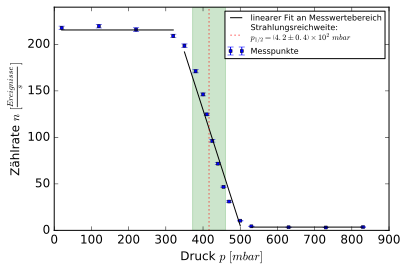

In [26]:
dp = 4
p = dataa.iloc[:,1].values
n = dataa.iloc[:,2].values/60
dn = dataa.iloc[:,3].values/60

fit_const = lambda p, n0: (p-p)+n0

fit_lin = lambda p, n0, b: p*b + n0

sl = [slice(0, 4), slice(4, 13), slice(13, 17)]
fit = [fit_const, fit_lin, fit_const]
fit_result = []
for i in range(3):
    popt, pcov = curve_fit(fit[i], p[sl[i]], n[sl[i]], sigma=dn[sl[i]])
    popt = un.uarray(popt, sqrt(diagonal(pcov)))
    fit_result.append(popt)
        
n_1, n_2 = fit_result[0][0], fit_result[2][0]
n_H = (n_1+n_2)/2
p_H = (n_H-fit_result[1][0])/fit_result[1][1]
display(Latex(r'$p_{{1/2}} = {:L} \ mbar$'.format(p_H)))

p0 = 1013
s0 = uc.ufloat(3.95, 0.05)
s1 = p_H/p0 * s0
display(Latex(r'$s_1 = {:L} \ cm$'.format(s1)))
s2 = 2.25/1.43
display(Latex(r'$s_2 = {:.2f} \ cm$'.format(s2)))
s3 = 0.68

s = s1 + s2 + s3
display(Latex(r'$s_{{ges}} = {:L} \ cm$'.format(s)))

figure()
yl = [0,240]
ylim(*yl)
xlabel(r'Druck $p \ [mbar]$')
ylabel(r'Zählrate $n \ [\frac{Ereignisse}{s}]$')
errorbar(p, n, yerr=dn, fmt='bs', label='Messpunkte')
label = ['linearer Fit an Messwertebereich',None,None]
for i in range(3):
    x_ = linspace(p[sl[i]][0], p[sl[i]][-1], 1000)
    plot(x_, fit[i](x_, *un.nominal_values(fit_result[i])), 'k-',label=label[i])
axvline(p_H.n, color='r', ls='dotted', label='Strahlungsreichweite:\n$p_{{1/2}} = {:L} \ mbar$'.format(p_H))
fill_betweenx(linspace(yl[0], yl[1]), p_H.n-p_H.s, p_H.n+p_H.s, color='green', alpha=0.2)
legend(fontsize=8)
show()